<a href="https://colab.research.google.com/github/gavriill/-Clustering/blob/master/cv_ver14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


No Connection : k = 8
No Connection : k = 11
No Connection : k = 8
No Connection : k = 11


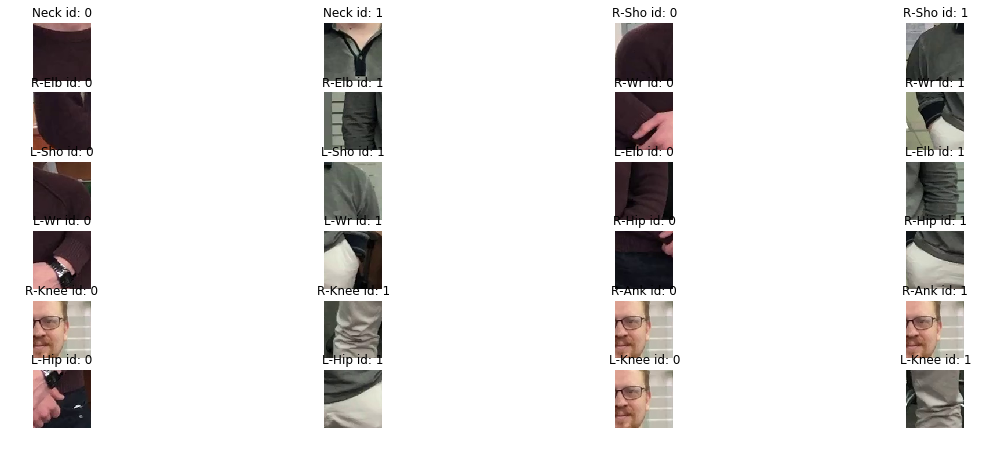

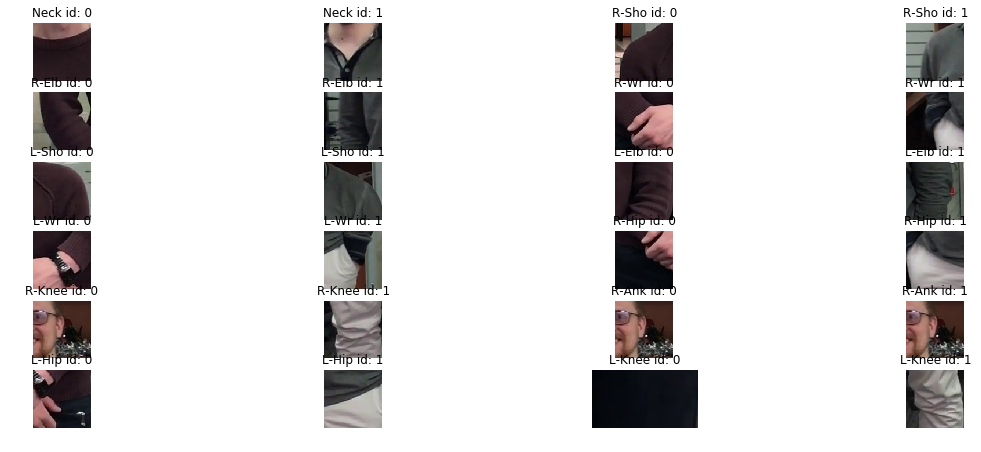

In [0]:
frame0=get_avarrage_colour("/drive/My Drive/content/frame0.jpg",)
frame2=get_avarrage_colour("/drive/My Drive/content/frame2.jpg")

In [0]:
frame0

{0: {'L-Elb': array([41.4864, 27.514 , 31.8813]),
  'L-Hip': array([87.8156, 62.4915, 65.6038]),
  'L-Knee': array([185.1679, 156.3876, 140.7558]),
  'L-Sho': array([58.6077, 39.0362, 39.4103]),
  'L-Wr': array([86.8372, 60.2045, 63.5281]),
  'Neck': array([57.8354, 37.443 , 42.1471]),
  'R-Ank': array([185.1679, 156.3876, 140.7558]),
  'R-Elb': array([51.1997, 31.8676, 36.0065]),
  'R-Hip': array([29.0403, 22.5431, 29.4317]),
  'R-Knee': array([185.1679, 156.3876, 140.7558]),
  'R-Sho': array([57.7718, 43.4431, 48.3465]),
  'R-Wr': array([90.5283, 56.9823, 61.9634])},
 1: {'L-Elb': array([75.0271, 79.5077, 74.0495]),
  'L-Hip': array([137.5158, 136.7288, 127.8952]),
  'L-Knee': array([107.0279, 103.3679,  95.9664]),
  'L-Sho': array([102.6135, 107.9642,  99.3891]),
  'L-Wr': array([108.1806, 104.5593,  97.6382]),
  'Neck': array([94.6914, 92.5709, 84.6497]),
  'R-Ank': array([185.1679, 156.3876, 140.7558]),
  'R-Elb': array([72.104 , 76.3943, 70.3751]),
  'R-Hip': array([132.813 , 132

In [0]:
frame2

{0: {'L-Elb': array([43.3086, 28.6412, 34.2976]),
  'L-Hip': array([62.9085, 45.0511, 49.639 ]),
  'L-Knee': array([10.29018182, 12.85654545, 19.02309091]),
  'L-Sho': array([63.5422, 50.0632, 52.9408]),
  'L-Wr': array([92.5967, 64.9735, 68.4086]),
  'Neck': array([62.8893, 42.858 , 45.588 ]),
  'R-Ank': array([96.2177, 68.1599, 61.507 ]),
  'R-Elb': array([65.2592, 55.0736, 55.0354]),
  'R-Hip': array([44.5292, 32.3487, 36.7752]),
  'R-Knee': array([96.2177, 68.1599, 61.507 ]),
  'R-Sho': array([58.5115, 44.307 , 45.6961]),
  'R-Wr': array([101.7839,  69.3286,  72.3958])},
 1: {'L-Elb': array([50.8116, 54.0458, 51.5656]),
  'L-Hip': array([119.9784, 118.7759, 117.1662]),
  'L-Knee': array([109.6205, 105.6437, 103.5738]),
  'L-Sho': array([58.4112, 60.5813, 58.3359]),
  'L-Wr': array([103.37  , 103.9901,  99.8136]),
  'Neck': array([90.9266, 81.6374, 78.4488]),
  'R-Ank': array([96.2177, 68.1599, 61.507 ]),
  'R-Elb': array([45.8005, 48.1517, 49.6769]),
  'R-Hip': array([111.7453, 108

In [0]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

from random import randint
import math


In [0]:
protoFile = "/drive/My Drive/content/pose_deploy_linevec.prototxt"
weightsFile = "/drive/My Drive/content/pose_iter_440000.caffemodel"
nPoints = 18
# COCO Output Format
keypointsMapping = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16] ]

# index of pafs correspoding to the POSE_PAIRS
# e.g for POSE_PAIR(1,2), the PAFs are located at indices (31,32) of output, Similarly, (1,5) -> (39,40) and so on.
mapIdx = [[31,32], [39,40], [33,34], [35,36], [41,42], [43,44], 
          [19,20], [21,22], [23,24], [25,26], [27,28], [29,30], 
          [47,48], [49,50], [53,54], [51,52], [55,56], 
          [37,38], [45,46]]

colors = [ [0,100,255], [0,100,255], [0,255,255], [0,100,255], [0,255,255], [0,100,255],
         [0,255,0], [255,200,100], [255,0,255], [0,255,0], [255,200,100], [255,0,255],
         [0,0,255], [255,0,0], [200,200,0], [255,0,0], [200,200,0], [0,0,0]]


In [0]:
# Find the Keypoints using Non Maximum Suppression on the Confidence Map
def getKeypoints(probMap, threshold=0.1):
    
    mapSmooth = cv2.GaussianBlur(probMap,(3,3),0,0)

    mapMask = np.uint8(mapSmooth>threshold)
    keypoints = []
    
    #find the blobs
    _, contours, _ = cv2.findContours(mapMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #for each blob find the maxima
    for cnt in contours:
        blobMask = np.zeros(mapMask.shape)
        blobMask = cv2.fillConvexPoly(blobMask, cnt, 1)
        maskedProbMap = mapSmooth * blobMask
        _, maxVal, _, maxLoc = cv2.minMaxLoc(maskedProbMap)
        keypoints.append(maxLoc + (probMap[maxLoc[1], maxLoc[0]],))

    return keypoints

In [0]:
# Find valid connections between the different joints of a all persons present
def getValidPairs(output,frameWidth,frameHeight,detected_keypoints,keypoints_list):
    valid_pairs = []
    invalid_pairs = []
    n_interp_samples = 10
    paf_score_th = 0.1
    conf_th = 0.7
    # loop for every POSE_PAIR
    for k in range(len(mapIdx)):
        # A->B constitute a limb
        pafA = output[0, mapIdx[k][0], :, :]
        pafB = output[0, mapIdx[k][1], :, :]
        pafA = cv2.resize(pafA, (frameWidth, frameHeight))
        pafB = cv2.resize(pafB, (frameWidth, frameHeight))

        # Find the keypoints for the first and second limb
        candA = detected_keypoints[POSE_PAIRS[k][0]]
        candB = detected_keypoints[POSE_PAIRS[k][1]]
        nA = len(candA)
        nB = len(candB)

        # If keypoints for the joint-pair is detected
        # check every joint in candA with every joint in candB 
        # Calculate the distance vector between the two joints
        # Find the PAF values at a set of interpolated points between the joints
        # Use the above formula to compute a score to mark the connection valid
        
        if( nA != 0 and nB != 0):
            valid_pair = np.zeros((0,3))
            for i in range(nA):
                max_j=-1
                maxScore = -1
                found = 0
                for j in range(nB):
                    # Find d_ij
                    d_ij = np.subtract(candB[j][:2], candA[i][:2])
                    norm = np.linalg.norm(d_ij)
                    if norm:
                        d_ij = d_ij / norm
                    else:
                        continue
                    # Find p(u)
                    interp_coord = list(zip(np.linspace(candA[i][0], candB[j][0], num=n_interp_samples),
                                            np.linspace(candA[i][1], candB[j][1], num=n_interp_samples)))
                    # Find L(p(u))
                    paf_interp = []
                    for k in range(len(interp_coord)):
                        paf_interp.append([pafA[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))],
                                           pafB[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))] ]) 
                    # Find E
                    paf_scores = np.dot(paf_interp, d_ij)
                    avg_paf_score = sum(paf_scores)/len(paf_scores)
                    
                    # Check if the connection is valid
                    # If the fraction of interpolated vectors aligned with PAF is higher then threshold -> Valid Pair  
                    if ( len(np.where(paf_scores > paf_score_th)[0]) / n_interp_samples ) > conf_th :
                        if avg_paf_score > maxScore:
                            max_j = j
                            maxScore = avg_paf_score
                            found = 1
                # Append the connection to the list
                if found:            
                    valid_pair = np.append(valid_pair, [[candA[i][3], candB[max_j][3], maxScore]], axis=0)

            # Append the detected connections to the global list
            valid_pairs.append(valid_pair)
        else: # If no keypoints are detected
            #print("No Connection : k = {}".format(k))
            invalid_pairs.append(k)
            valid_pairs.append([])
    #print(valid_pairs)
    return valid_pairs, invalid_pairs

In [0]:
# This function creates a list of keypoints belonging to each person
# For each detected valid pair, it assigns the joint(s) to a person
# It finds the person and index at which the joint should be added. This can be done since we have an id for each joint
def getPersonwiseKeypoints(valid_pairs, invalid_pairs,keypoints_list):
    # the last number in each row is the overall score 
    personwiseKeypoints = -1 * np.ones((0, 19))

    for k in range(len(mapIdx)):
        if k not in invalid_pairs:
            partAs = valid_pairs[k][:,0]
            partBs = valid_pairs[k][:,1]
            indexA, indexB = np.array(POSE_PAIRS[k])

            for i in range(len(valid_pairs[k])): 
                found = 0
                person_idx = -1
                for j in range(len(personwiseKeypoints)):
                    if personwiseKeypoints[j][indexA] == partAs[i]:
                        person_idx = j
                        found = 1
                        break

                if found:
                    personwiseKeypoints[person_idx][indexB] = partBs[i]
                    personwiseKeypoints[person_idx][-1] += keypoints_list[partBs[i].astype(int), 2] + valid_pairs[k][i][2]

                # if find no partA in the subset, create a new subset
                elif not found and k < 17:
                    row = -1 * np.ones(19)
                    row[indexA] = partAs[i]
                    row[indexB] = partBs[i]
                    # add the keypoint_scores for the two keypoints and the paf_score 
                    row[-1] = sum(keypoints_list[valid_pairs[k][i,:2].astype(int), 2]) + valid_pairs[k][i][2]
                    personwiseKeypoints = np.vstack([personwiseKeypoints, row])
    return personwiseKeypoints

In [0]:
def get_avarrage_colour(img,sdvig=10):
  image1 = cv2.imread(img)
  frameWidth = image1.shape[1]
  frameHeight = image1.shape[0]
  #print(frameWidth,frameHeight)
  
  ######################################################################################
  #Обучимся детктить
  net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

  # Fix the input Height and get the width according to the Aspect Ratio
  inHeight = 368
  inWidth = int((inHeight/frameHeight)*frameWidth)

  inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                            (0, 0, 0), swapRB=False, crop=False)

  net.setInput(inpBlob)
  output = net.forward()
  #######################################################################################
  
  detected_keypoints = []
  keypoints_list = np.zeros((0,3))
  keypoint_id = 0
  threshold = 0.1

  for part in range(nPoints):
      probMap = output[0,part,:,:]
      probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
  #     plt.figure()
  #     plt.imshow(255*np.uint8(probMap>threshold))
      keypoints = getKeypoints(probMap, threshold)
      #print("Keypoints - {} : {}".format(keypointsMapping[part], keypoints))
      keypoints_with_id = []
      for i in range(len(keypoints)):
          keypoints_with_id.append(keypoints[i] + (keypoint_id,))
          keypoints_list = np.vstack([keypoints_list, keypoints[i]])
          keypoint_id += 1

      detected_keypoints.append(keypoints_with_id)  
  #print(222)
  valid_pairs, invalid_pairs = getValidPairs(output,frameWidth,frameHeight,detected_keypoints,keypoints_list)
  personwiseKeypoints = getPersonwiseKeypoints(valid_pairs, invalid_pairs,keypoints_list)
  frameClone = image1.copy()
  row=8
  col=4
  d=[]
  num=11
  sdvig=50
  avgs={}
  fig = plt.figure(figsize=(20, 10))
  ax = []
  indx=1
 
  ######################################################################################
  #вытащим средние цвета для каждой точки
  for n in range(len(personwiseKeypoints)): 
            avgs[n]={}
  for i in range(18):

      if keypointsMapping[i]  in keypointsMapping_new:

        #print(keypointsMapping[i])
        for n in range(len(personwiseKeypoints)):
          index = int(personwiseKeypoints[n][i])
          if index==-1:
            continue
          h=[np.int32(keypoints_list[index, 1]),np.int32(keypoints_list[index, 0])]
          #print(h)  
          frameClone_temp = image1.copy()
          myimg = frameClone_temp[h[0]-sdvig:h[0]+sdvig,h[1]-sdvig:h[1]+sdvig][:,:,[2,1,0]]
          #print(myimg.shape)
          avg_color_per_row = np.average(myimg, axis=0)
          avg_color = np.average(avg_color_per_row, axis=0)
          avgs[n][keypointsMapping[i]]=avg_color
          ax.append( fig.add_subplot(row, col, indx)  )
          ax[-1].set_title(keypointsMapping[i]+ ' id: '+str(n), fontsize=9)
          #print("!!",myimg.shape)
          plt.imshow(myimg)
          plt.axis('off')
          indx+=1
  return avgs

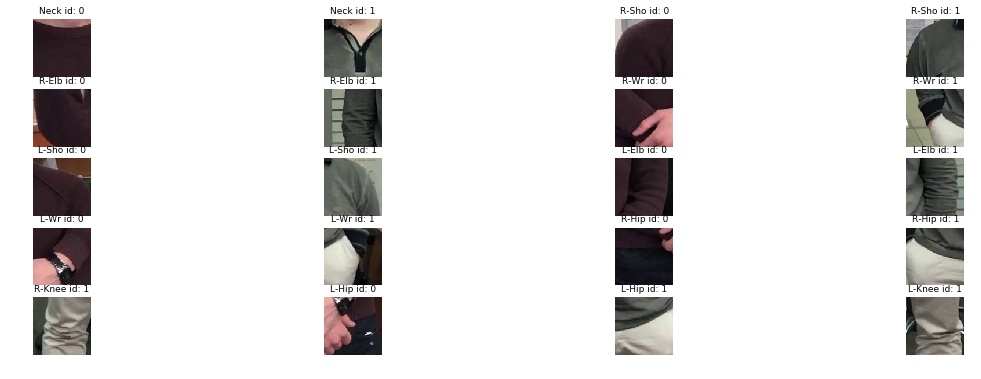

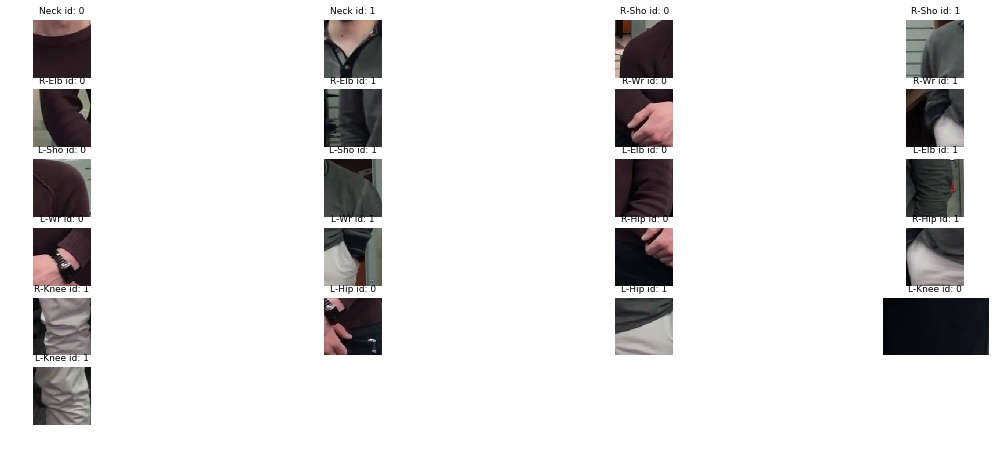

In [141]:
frame0=get_avarrage_colour("/drive/My Drive/content/frame0.jpg")
frame2=get_avarrage_colour("/drive/My Drive/content/frame2.jpg")

In [331]:
frame0

{0: {'L-Elb': array([41.4864, 27.514 , 31.8813]),
  'L-Hip': array([87.8156, 62.4915, 65.6038]),
  'L-Sho': array([58.6077, 39.0362, 39.4103]),
  'L-Wr': array([86.8372, 60.2045, 63.5281]),
  'Neck': array([57.8354, 37.443 , 42.1471]),
  'R-Elb': array([51.1997, 31.8676, 36.0065]),
  'R-Hip': array([29.0403, 22.5431, 29.4317]),
  'R-Sho': array([57.7718, 43.4431, 48.3465]),
  'R-Wr': array([90.5283, 56.9823, 61.9634])},
 1: {'L-Elb': array([75.0271, 79.5077, 74.0495]),
  'L-Hip': array([137.5158, 136.7288, 127.8952]),
  'L-Knee': array([107.0279, 103.3679,  95.9664]),
  'L-Sho': array([102.6135, 107.9642,  99.3891]),
  'L-Wr': array([108.1806, 104.5593,  97.6382]),
  'Neck': array([94.6914, 92.5709, 84.6497]),
  'R-Elb': array([72.104 , 76.3943, 70.3751]),
  'R-Hip': array([132.813 , 132.1022, 123.9878]),
  'R-Knee': array([116.5584, 113.7072, 105.0919]),
  'R-Sho': array([75.4502, 78.6853, 75.1289]),
  'R-Wr': array([116.2795, 118.392 , 105.9107])}}

In [0]:
#Нашел в инете какую-то хреновину- она близость ргб сопоставляет
#Это бардовый и зеленый
#get_colour_distanse(frame0[0]["L-Elb"],frame0[1]["L-Sho"])
### 180.4747413281766

#Это бардовый и бардовый
#get_colour_distanse(frame0[0]["L-Elb"],frame0[0]["R-Sho"])
### 21.639492212375366

####  Вроде похоже на правду

from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000
#!pip3 install colormath
def get_colour_distanse(color1,color2):

  color1_rgb = sRGBColor(color1[0],color1[1],color1[2]);

  color2_rgb = sRGBColor(color2[0],color2[1],color2[2]);

# Convert from RGB to Lab Color Space
  color1_lab = convert_color(color1_rgb, LabColor);

# Convert from RGB to Lab Color Space
  color2_lab = convert_color(color2_rgb, LabColor);

# Find the color difference
  delta_e = delta_e_cie2000(color1_lab, color2_lab);
  return delta_e


In [0]:
def compare_point(frame0,frame2):
  
  # Достанем общие точки у фреймов
  common_points=reduce(set.intersection, (set(val) for val in frame0.values()))&reduce(set.intersection, (set(val) for val in frame2.values()))
  # Достанем все детектировнаые id
  all_person=set([int(val) for val in list(frame2.keys())]).union(set([int(val) for val in list(frame0.keys())]) )
  results={}
  for n in range(len(all_person)): 
                 results[n]={}

  for point in common_points:
    for id0,id1 in list(combinations(all_person, 2)) :
      #print(id0,id1)
      #print(point)
      # найдем минимальное расстояние между точкой первого объекта на первом фрейме и аналогичными точкаи на втором
      #print(get_colour_distanse(frame0[id0][point],frame2[id0][point]))
      ##print(get_colour_distanse(frame0[id0][point],frame2[id1][point]))

      #print([id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])]))])
      results[id0][point]=[id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])]))]
       # найдем минимальное расстояние между точкой второго объекта на первом фрейме и аналогичными точкаи на втором
      #print(get_colour_distanse(frame0[id1][point],frame2[id0][point]))
      #print(get_colour_distanse(frame0[id1][point],frame2[id1][point])) 
      #print([id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id1][point],frame2[id0][point]),get_colour_distanse(frame0[id1][point],frame2[id1][point])]))])
      results[id1][point]=[id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id1][point],frame2[id0][point]),get_colour_distanse(frame0[id1][point],frame2[id1][point])]))]
  print('Такие тчоки выбрали при сравнении')
  print(results)
  # Здесь простое голосование
  results_ids={}
  for x in all_person:
    #print(x)
    results_ids[x]=mode(list(results[x].values()))[0][0]
    #print(mode(list(results[x].values()))[0][0])
  print('Вот результат типа')
  print(results_ids)  

In [377]:
compare_point(frame0,frame2)

Такие тчоки выбрали при сравнении
{0: {'L-Sho': 0, 'R-Sho': 0, 'L-Elb': 0, 'Neck': 0, 'R-Elb': 0, 'L-Hip': 0, 'L-Wr': 0, 'R-Wr': 0, 'R-Hip': 0}, 1: {'L-Sho': 1, 'R-Sho': 1, 'L-Elb': 1, 'Neck': 1, 'R-Elb': 1, 'L-Hip': 1, 'L-Wr': 1, 'R-Wr': 1, 'R-Hip': 1}}
Вот результат типа
{0: 0, 1: 1}


In [0]:
############################# КОНЕЦ   """"""""""""""""""""""""""""""""""""""""""""""""""

In [0]:
# Достанем общие точки у фреймов
common_points=reduce(set.intersection, (set(val) for val in frame0.values()))&reduce(set.intersection, (set(val) for val in frame2.values()))
# Достанем все детектировнаые id
all_person=set([int(val) for val in list(frame2.keys())]).union(set([int(val) for val in list(frame0.keys())]) )


In [371]:
results={}
for n in range(len(all_person)): 
               results[n]={}

for point in common_points:
  for id0,id1 in list(combinations(all_person, 2)) :
    #print(id0,id1)
    #print(point)
    # найдем минимальное расстояние между точкой первого объекта на первом фрейме и аналогичными точкаи на втором
    #print(get_colour_distanse(frame0[id0][point],frame2[id0][point]))
    ##print(get_colour_distanse(frame0[id0][point],frame2[id1][point]))
    
    #print([id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])]))])
    results[id0][point]=[id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])]))]
     # найдем минимальное расстояние между точкой второго объекта на первом фрейме и аналогичными точкаи на втором
    #print(get_colour_distanse(frame0[id1][point],frame2[id0][point]))
    #print(get_colour_distanse(frame0[id1][point],frame2[id1][point])) 
    #print([id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id1][point],frame2[id0][point]),get_colour_distanse(frame0[id1][point],frame2[id1][point])]))])
    results[id1][point]=[id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id1][point],frame2[id0][point]),get_colour_distanse(frame0[id1][point],frame2[id1][point])]))]
print(results)

results_ids={}
for x in all_person:
  print(x)
  results_ids[x]=mode(list(results[x].values()))[0][0]
  #print(mode(list(results[x].values()))[0][0])
  
print(results_ids)

{0: {'L-Sho': 0, 'R-Sho': 0, 'L-Elb': 0, 'Neck': 0, 'R-Elb': 0, 'L-Hip': 0, 'L-Wr': 0, 'R-Wr': 0, 'R-Hip': 0}, 1: {'L-Sho': 1, 'R-Sho': 1, 'L-Elb': 1, 'Neck': 1, 'R-Elb': 1, 'L-Hip': 1, 'L-Wr': 1, 'R-Wr': 1, 'R-Hip': 1}}
0
1
{0: 0, 1: 1}


In [336]:
int(np.array(list(results[0].values()))[0])

0

In [0]:
from scipy.stats import mode
#>>> stats.mode(a)

In [359]:
mode(list(results[0].values()))[0][0]

0

In [369]:
results_ids

{1: 1}

180.4747413281766

In [212]:
get_colour_distanse(frame0[0]["L-Elb"],frame0[1]["R-Sho"])

158.05080781220298

In [14]:
frame2

{0: {'L-Elb': array([43.3086, 28.6412, 34.2976]),
  'L-Hip': array([62.9085, 45.0511, 49.639 ]),
  'L-Knee': array([10.29018182, 12.85654545, 19.02309091]),
  'L-Sho': array([63.5422, 50.0632, 52.9408]),
  'L-Wr': array([92.5967, 64.9735, 68.4086]),
  'Neck': array([62.8893, 42.858 , 45.588 ]),
  'R-Elb': array([65.2592, 55.0736, 55.0354]),
  'R-Hip': array([44.5292, 32.3487, 36.7752]),
  'R-Sho': array([58.5115, 44.307 , 45.6961]),
  'R-Wr': array([101.7839,  69.3286,  72.3958])},
 1: {'L-Elb': array([50.8116, 54.0458, 51.5656]),
  'L-Hip': array([119.9784, 118.7759, 117.1662]),
  'L-Knee': array([109.6205, 105.6437, 103.5738]),
  'L-Sho': array([58.4112, 60.5813, 58.3359]),
  'L-Wr': array([103.37  , 103.9901,  99.8136]),
  'Neck': array([90.9266, 81.6374, 78.4488]),
  'R-Elb': array([45.8005, 48.1517, 49.6769]),
  'R-Hip': array([111.7453, 108.5812, 110.0794]),
  'R-Knee': array([112.5568, 106.1227, 106.7909]),
  'R-Sho': array([ 95.0525, 100.6306,  97.9368]),
  'R-Wr': array([64.96

In [15]:
frame0

{0: {'L-Elb': array([41.4864, 27.514 , 31.8813]),
  'L-Hip': array([87.8156, 62.4915, 65.6038]),
  'L-Sho': array([58.6077, 39.0362, 39.4103]),
  'L-Wr': array([86.8372, 60.2045, 63.5281]),
  'Neck': array([57.8354, 37.443 , 42.1471]),
  'R-Elb': array([51.1997, 31.8676, 36.0065]),
  'R-Hip': array([29.0403, 22.5431, 29.4317]),
  'R-Sho': array([57.7718, 43.4431, 48.3465]),
  'R-Wr': array([90.5283, 56.9823, 61.9634])},
 1: {'L-Elb': array([75.0271, 79.5077, 74.0495]),
  'L-Hip': array([137.5158, 136.7288, 127.8952]),
  'L-Knee': array([107.0279, 103.3679,  95.9664]),
  'L-Sho': array([102.6135, 107.9642,  99.3891]),
  'L-Wr': array([108.1806, 104.5593,  97.6382]),
  'Neck': array([94.6914, 92.5709, 84.6497]),
  'R-Elb': array([72.104 , 76.3943, 70.3751]),
  'R-Hip': array([132.813 , 132.1022, 123.9878]),
  'R-Knee': array([116.5584, 113.7072, 105.0919]),
  'R-Sho': array([75.4502, 78.6853, 75.1289]),
  'R-Wr': array([116.2795, 118.392 , 105.9107])}}

In [140]:
frame0[0].keys()

TypeError: ignored

In [0]:
from itertools import combinations 
  

In [168]:
list(combinations(all_person, 2)) 

[(0, 1)]

In [60]:
common_points=[]
all_person=[]
for y in [frame0,frame2]:
    #print(list(y.keys()))
    #if len(comomon_person)==0:
    all_person.extend(list(y.keys()))

print(set(all_person))

for x 

{0, 1}


In [64]:
for x in [frame0,frame2]:
  for y in set(all_person):
    print(list(x[y].keys()))

['Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 'L-Elb', 'L-Wr', 'R-Hip', 'L-Hip']
['Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'L-Hip', 'L-Knee']
['Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 'L-Elb', 'L-Wr', 'R-Hip', 'L-Hip', 'L-Knee']
['Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'L-Hip', 'L-Knee']


In [67]:
reduce(set.intersection, (set(val) for val in frame0.values()))

{'L-Elb', 'L-Hip', 'L-Sho', 'L-Wr', 'Neck', 'R-Elb', 'R-Hip', 'R-Sho', 'R-Wr'}

In [68]:
for x in [frame0,frame2]:
  A=reduce(set.intersection, (set(val) for val in x.values()))
  print(A)
  
  print(B)

{'L-Sho', 'R-Sho', 'L-Elb', 'Neck', 'R-Elb', 'L-Hip', 'L-Wr', 'R-Wr', 'R-Hip'}
{'L-Sho', 'R-Sho', 'L-Elb', 'Neck', 'R-Elb', 'L-Hip', 'L-Knee', 'L-Wr', 'R-Wr', 'R-Hip'}


In [0]:
common_points=reduce(set.intersection, (set(val) for val in frame0.values()))&reduce(set.intersection, (set(val) for val in frame2.values()))
all_person=set([int(val) for val in list(frame2.keys())]).union(set([int(val) for val in list(frame0.keys())]) )

In [0]:
get_colour_distanse()

In [193]:
frame0

{0: {'L-Elb': array([41.4864, 27.514 , 31.8813]),
  'L-Hip': array([87.8156, 62.4915, 65.6038]),
  'L-Sho': array([58.6077, 39.0362, 39.4103]),
  'L-Wr': array([86.8372, 60.2045, 63.5281]),
  'Neck': array([57.8354, 37.443 , 42.1471]),
  'R-Elb': array([51.1997, 31.8676, 36.0065]),
  'R-Hip': array([29.0403, 22.5431, 29.4317]),
  'R-Sho': array([57.7718, 43.4431, 48.3465]),
  'R-Wr': array([90.5283, 56.9823, 61.9634])},
 1: {'L-Elb': array([75.0271, 79.5077, 74.0495]),
  'L-Hip': array([137.5158, 136.7288, 127.8952]),
  'L-Knee': array([107.0279, 103.3679,  95.9664]),
  'L-Sho': array([102.6135, 107.9642,  99.3891]),
  'L-Wr': array([108.1806, 104.5593,  97.6382]),
  'Neck': array([94.6914, 92.5709, 84.6497]),
  'R-Elb': array([72.104 , 76.3943, 70.3751]),
  'R-Hip': array([132.813 , 132.1022, 123.9878]),
  'R-Knee': array([116.5584, 113.7072, 105.0919]),
  'R-Sho': array([75.4502, 78.6853, 75.1289]),
  'R-Wr': array([116.2795, 118.392 , 105.9107])}}

In [150]:
frame2

{0: {'L-Elb': array([43.3086, 28.6412, 34.2976]),
  'L-Hip': array([62.9085, 45.0511, 49.639 ]),
  'L-Knee': array([10.29018182, 12.85654545, 19.02309091]),
  'L-Sho': array([63.5422, 50.0632, 52.9408]),
  'L-Wr': array([92.5967, 64.9735, 68.4086]),
  'Neck': array([62.8893, 42.858 , 45.588 ]),
  'R-Elb': array([65.2592, 55.0736, 55.0354]),
  'R-Hip': array([44.5292, 32.3487, 36.7752]),
  'R-Sho': array([58.5115, 44.307 , 45.6961]),
  'R-Wr': array([101.7839,  69.3286,  72.3958])},
 1: {'L-Elb': array([50.8116, 54.0458, 51.5656]),
  'L-Hip': array([119.9784, 118.7759, 117.1662]),
  'L-Knee': array([109.6205, 105.6437, 103.5738]),
  'L-Sho': array([58.4112, 60.5813, 58.3359]),
  'L-Wr': array([103.37  , 103.9901,  99.8136]),
  'Neck': array([90.9266, 81.6374, 78.4488]),
  'R-Elb': array([45.8005, 48.1517, 49.6769]),
  'R-Hip': array([111.7453, 108.5812, 110.0794]),
  'R-Knee': array([112.5568, 106.1227, 106.7909]),
  'R-Sho': array([ 95.0525, 100.6306,  97.9368]),
  'R-Wr': array([64.96

In [163]:
for frame_0,frame_2 in zip([frame0],[frame2]):
   list(itertools.product(list1, list1))
    

(0,)
(1,)


In [192]:
result.keys=all_person

NameError: ignored

In [174]:
 list(combinations(common_points, 2))

[('L-Sho', 'R-Sho'),
 ('L-Sho', 'L-Elb'),
 ('L-Sho', 'Neck'),
 ('L-Sho', 'R-Elb'),
 ('L-Sho', 'L-Hip'),
 ('L-Sho', 'L-Wr'),
 ('L-Sho', 'R-Wr'),
 ('L-Sho', 'R-Hip'),
 ('R-Sho', 'L-Elb'),
 ('R-Sho', 'Neck'),
 ('R-Sho', 'R-Elb'),
 ('R-Sho', 'L-Hip'),
 ('R-Sho', 'L-Wr'),
 ('R-Sho', 'R-Wr'),
 ('R-Sho', 'R-Hip'),
 ('L-Elb', 'Neck'),
 ('L-Elb', 'R-Elb'),
 ('L-Elb', 'L-Hip'),
 ('L-Elb', 'L-Wr'),
 ('L-Elb', 'R-Wr'),
 ('L-Elb', 'R-Hip'),
 ('Neck', 'R-Elb'),
 ('Neck', 'L-Hip'),
 ('Neck', 'L-Wr'),
 ('Neck', 'R-Wr'),
 ('Neck', 'R-Hip'),
 ('R-Elb', 'L-Hip'),
 ('R-Elb', 'L-Wr'),
 ('R-Elb', 'R-Wr'),
 ('R-Elb', 'R-Hip'),
 ('L-Hip', 'L-Wr'),
 ('L-Hip', 'R-Wr'),
 ('L-Hip', 'R-Hip'),
 ('L-Wr', 'R-Wr'),
 ('L-Wr', 'R-Hip'),
 ('R-Wr', 'R-Hip')]

In [173]:
for frame in (frame0,frame2):
  for id0,id1 in list(combinations(common_points, 2)) :
    print(id0,id1)
    break

L-Sho R-Sho
L-Sho R-Sho


In [204]:
np.argmin(np.array([10,2]))

1

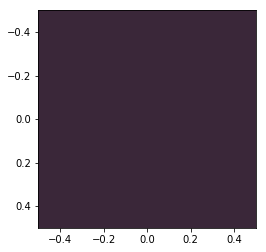

In [218]:
import matplotlib.pyplot as plt
plt.imshow([[(58, 39, 57)]])

In [0]:
[58.6077 39.0362 39.4103] [63.5422 50.0632 52.9408]

In [219]:
get_colour_distanse([58.6077, 39.0362, 39.4103], [63.5422, 50.0632, 52.9408])

20.931794005842182

In [210]:
get_colour_distanse([58.6077, 39.0362, 39.4103], [58.4112, 60.5813, 58.3359])

121.8437728695215

In [0]:
all_person_={0, 1,2}

In [229]:
for id0,id1 in list(combinations(all_person_, 2)) :
  print(id0,id1)

0 1
0 2
1 2


In [289]:
>>> keys = ['a', 'b', 'c']
>>> values = [1, 2, 3]
>>> dictionary = dict(zip(keys, values))
>>> print(dictionary)


{'a': 1, 'b': 2, 'c': 3}


In [295]:
common_points

{'L-Elb', 'L-Hip', 'L-Sho', 'L-Wr', 'Neck', 'R-Elb', 'R-Hip', 'R-Sho', 'R-Wr'}

In [330]:
int(np.array(list(results[0].values()))[0])

0

In [317]:
results[0]

{'L-Elb': 0,
 'L-Hip': 0,
 'L-Sho': 0,
 'L-Wr': 0,
 'Neck': 0,
 'R-Elb': 0,
 'R-Hip': 0,
 'R-Sho': 0,
 'R-Wr': 0}

In [0]:
for n in range(len(all_person)): 
               results[n]={}

In [313]:

for n in range(len(all_person)): 
               results[n]={}

for point in common_points:
  for id0,id1 in list(combinations(all_person, 2)) :
    print(id0,id1)
    print(point)
    # найдем минимальное расстояние между точкой первого объекта на первом фрейме и аналогичными точкаи на втором
    print(get_colour_distanse(frame0[id0][point],frame2[id0][point]))
    print(get_colour_distanse(frame0[id0][point],frame2[id1][point]))
    
    print([id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])]))])
    results[id0][point]=[id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])]))]
     # найдем минимальное расстояние между точкой второго объекта на первом фрейме и аналогичными точкаи на втором
    print(get_colour_distanse(frame0[id1][point],frame2[id0][point]))
    print(get_colour_distanse(frame0[id1][point],frame2[id1][point])) 
    print([id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id1][point],frame2[id0][point]),get_colour_distanse(frame0[id1][point],frame2[id1][point])]))])
    results[id1][point]=[id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id1][point],frame2[id0][point]),get_colour_distanse(frame0[id1][point],frame2[id1][point])]))]

0 1
L-Sho
20.931794005842033
121.84377286952154
0
171.08317848105347
37.29427345836015
1
0 1
R-Sho
15.641861101366485
167.50152038020045
0
148.3782374208546
20.543610431075972
1
0 1
L-Elb
4.84364231022061
151.8633388275349
0
171.4591866735659
24.652818376370405
1
0 1
Neck
8.581258032751379
57.67305361831813
0
122.34513381082796
79.99970905790057
1
0 1
R-Elb
30.23895539818096
108.6285549014045
0
151.0100323858263
84.38397611798146
1
0 1
L-Hip
20.4107515157401
70.02394278696757
0
144.26698529188144
35.76111741012227
1
0 1
L-Wr
3.8347421854132064
116.08443464231486
0
101.32783091195667
32.328445106850836
1
0 1
R-Wr
9.282427737460134
37.69186445564509
0
146.95311806770482
117.42245944035331
1
0 1
R-Hip
30.24049304989269
76.53068124651809
0
151.8093785572996
111.59627976715065
1


In [276]:


for point in common_point_:
  for id0,id1 in list(combinations(all_person, 2)) :
    print(id0,id1)
    print(point)
    #print(frame0[id0][point],frame2[id0][point])
    #print([[frame0[id0][point][0],frame0[id0][point][1],frame0[id0][point][2]])
    #plt.imshow([[(int(frame0[id0][point][0]),int(frame0[id0][point][1]),int(frame0[id0][point][2]))]])
    #plt.imshow([[(int(frame2[id0][point][0]),int(frame2[id0][point][1]),int(frame2[id0][point][2]))]])
   # plt.imshow([[(int(frame2[id1][point][0]),int(frame2[id1][point][1]),int(frame2[id1][point][2]))]])
    #print(frame0[id0][point],frame2[id1][point])
   # print(get_colour_distanse(frame0[id0][point],frame2[id0][point]))
    #print(get_colour_distanse(frame0[id0][point],frame2[id1][point]))
    #print(np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])])))
    print([id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])]))])
    #print([id0,id1][np.argmin(np.array([get_colour_distanse(frame0[id0][point],frame2[id0][point]),get_colour_distanse(frame0[id0][point],frame2[id1][point])]))])
    
    
    

0 1
L-Sho
[58.6077 39.0362 39.4103] [63.5422 50.0632 52.9408]
[58.6077 39.0362 39.4103] [58.4112 60.5813 58.3359]
20.931794005842033
121.84377286952154
0


In [183]:
for id0,id1 in list(combinations(all_person, 2)) :
    print(id0,id1)
    for point in common_points:
      print(point)
      print(get_colour_distanse(frame0[id0][point],frame2[id0][point]))
      print(get_colour_distanse(frame0[id0][point],frame2[id0][point]))

0 1
L-Sho
20.931794005842033
R-Sho
15.641861101366485
L-Elb
4.84364231022061
Neck
8.581258032751379
R-Elb
30.23895539818096
L-Hip
20.4107515157401
L-Wr
3.8347421854132064
R-Wr
9.282427737460134
R-Hip
30.24049304989269


In [175]:

for x in all_person:
   for y in common_points:
    print(frame[x][y])

[63.5422 50.0632 52.9408]
[58.5115 44.307  45.6961]
[43.3086 28.6412 34.2976]
[62.8893 42.858  45.588 ]
[65.2592 55.0736 55.0354]
[62.9085 45.0511 49.639 ]
[92.5967 64.9735 68.4086]
[101.7839  69.3286  72.3958]
[44.5292 32.3487 36.7752]
[58.4112 60.5813 58.3359]
[ 95.0525 100.6306  97.9368]
[50.8116 54.0458 51.5656]
[90.9266 81.6374 78.4488]
[45.8005 48.1517 49.6769]
[119.9784 118.7759 117.1662]
[103.37   103.9901  99.8136]
[64.9615 62.2186 63.3866]
[111.7453 108.5812 110.0794]


In [102]:
frame0[0]["L-Elb"]

array([41.4864, 27.514 , 31.8813])

In [103]:
frame0[0]["R-Sho"]

array([57.7718, 43.4431, 48.3465])

In [99]:
get_colour_distanse(frame0[0]["L-Elb"],frame0[0]["R-Sho"])

21.639492212375366

In [131]:
for x,y in (frame0[0]["L-Elb"],frame0[0]["R-Sho"]):
  #print(get_colour_distanse(x,y))
  #print(get_colour_distanse(np.array(x),np.array(y)))
  print(x)
  break

[41.4864 27.514  31.8813]


In [129]:
list(itertools.product(frame0[0]["L-Elb"],frame0[0]["R-Sho"])) 

[(41.48640000000001, 57.77179999999999),
 (41.48640000000001, 43.443099999999994),
 (41.48640000000001, 48.3465),
 (27.513999999999996, 57.77179999999999),
 (27.513999999999996, 43.443099999999994),
 (27.513999999999996, 48.3465),
 (31.88130000000001, 57.77179999999999),
 (31.88130000000001, 43.443099999999994),
 (31.88130000000001, 48.3465)]

In [123]:
for x in zip(frame0[0]["L-Elb"],frame0[0]["R-Sho"]):
  print(x)
  break

(41.48640000000001, 57.77179999999999)


In [120]:
frame0[0]

{'L-Elb': array([41.4864, 27.514 , 31.8813]),
 'L-Hip': array([87.8156, 62.4915, 65.6038]),
 'L-Sho': array([58.6077, 39.0362, 39.4103]),
 'L-Wr': array([86.8372, 60.2045, 63.5281]),
 'Neck': array([57.8354, 37.443 , 42.1471]),
 'R-Elb': array([51.1997, 31.8676, 36.0065]),
 'R-Hip': array([29.0403, 22.5431, 29.4317]),
 'R-Sho': array([57.7718, 43.4431, 48.3465]),
 'R-Wr': array([90.5283, 56.9823, 61.9634])}

In [128]:
list1 =[11, 22, 33, 44] 
list2 =[22, 44, 66] 
  
# using itertools 
temp = list(itertools.product(list1, list1)) 
temp

[(11, 11),
 (11, 22),
 (11, 33),
 (11, 44),
 (22, 11),
 (22, 22),
 (22, 33),
 (22, 44),
 (33, 11),
 (33, 22),
 (33, 33),
 (33, 44),
 (44, 11),
 (44, 22),
 (44, 33),
 (44, 44)]

In [0]:
import itertools

In [70]:
reduce(set.intersection, (set(val) for val in frame0.keys()))&reduce(set.intersection, (set(val) for val in frame2.keys()))

TypeError: ignored

In [74]:
str(frame2.keys())

'dict_keys([0, 1])'

In [89]:
[int(val) for val in list(frame2.keys())] 

[0, 1]

In [91]:
set([int(val) for val in list(frame2.keys())]).union(set([int(val) for val in list(frame0.keys())]) )

{0, 1}

In [86]:
[set(val) for val in list(frame2.keys())]

TypeError: ignored

In [0]:
from functools import reduce

In [0]:
sets = [s1, s2, s3]
>>> set.intersection(*sets)

In [53]:
common_points=[]
comomon_person=[]
for y in [frame0,frame2]:
    print(list(y.keys()))
    if len(comomon_person)==0:
      comomon_person.extend(list(y.keys())[:])
    else:
      intersection(comomon_person,list(y.keys()))
    print(comomon_person)

[0, 1]
[0, 1]
[0, 1]
[0, 1]


In [54]:
comomon_person[:]

[0, 1]

In [19]:
common_points=[]
for x in zip(frame0,frame2):
  print(x)
  for y in [frame0,frame2]:
    print(y[x])

(0, 0)


KeyError: ignored

In [0]:
frame0[0]['L-Elb'][0]

41.48640000000001

In [0]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
  

In [96]:
#!pip3 install colormath

  Stored in directory: /root/.cache/pip/wheels/20/49/7b/9635bccd6136cc713f623caa85ced89c0c63878f8b2a58fe99
Successfully built colormath


In [0]:
frame0[0]["L-Elb"]

TypeError: ignored

In [0]:
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000
#!pip3 install colormath
def get_colour_distanse(color1,color2):

  color1_rgb = sRGBColor(color1[0],color1[1],color1[2]);

  color2_rgb = sRGBColor(color2[0],color2[1],color2[2]);

# Convert from RGB to Lab Color Space
  color1_lab = convert_color(color1_rgb, LabColor);

# Convert from RGB to Lab Color Space
  color2_lab = convert_color(color2_rgb, LabColor);

# Find the color difference
  delta_e = delta_e_cie2000(color1_lab, color2_lab);
  return delta_e


In [0]:
# Find valid connections between the different joints of a all persons present
def getValidPairs(output,frameWidth,frameHeight,detected_keypoints,keypoints_list):
    valid_pairs = []
    invalid_pairs = []
    n_interp_samples = 10
    paf_score_th = 0.1
    conf_th = 0.7
    # loop for every POSE_PAIR
    for k in range(len(mapIdx)):
        # A->B constitute a limb
        pafA = output[0, mapIdx[k][0], :, :]
        pafB = output[0, mapIdx[k][1], :, :]
        pafA = cv2.resize(pafA, (frameWidth, frameHeight))
        pafB = cv2.resize(pafB, (frameWidth, frameHeight))

        # Find the keypoints for the first and second limb
        candA = detected_keypoints[POSE_PAIRS[k][0]]
        candB = detected_keypoints[POSE_PAIRS[k][1]]
        nA = len(candA)
        nB = len(candB)

        # If keypoints for the joint-pair is detected
        # check every joint in candA with every joint in candB 
        # Calculate the distance vector between the two joints
        # Find the PAF values at a set of interpolated points between the joints
        # Use the above formula to compute a score to mark the connection valid
        
        if( nA != 0 and nB != 0):
            valid_pair = np.zeros((0,3))
            for i in range(nA):
                max_j=-1
                maxScore = -1
                found = 0
                for j in range(nB):
                    # Find d_ij
                    d_ij = np.subtract(candB[j][:2], candA[i][:2])
                    norm = np.linalg.norm(d_ij)
                    if norm:
                        d_ij = d_ij / norm
                    else:
                        continue
                    # Find p(u)
                    interp_coord = list(zip(np.linspace(candA[i][0], candB[j][0], num=n_interp_samples),
                                            np.linspace(candA[i][1], candB[j][1], num=n_interp_samples)))
                    # Find L(p(u))
                    paf_interp = []
                    for k in range(len(interp_coord)):
                        paf_interp.append([pafA[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))],
                                           pafB[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))] ]) 
                    # Find E
                    paf_scores = np.dot(paf_interp, d_ij)
                    avg_paf_score = sum(paf_scores)/len(paf_scores)
                    
                    # Check if the connection is valid
                    # If the fraction of interpolated vectors aligned with PAF is higher then threshold -> Valid Pair  
                    if ( len(np.where(paf_scores > paf_score_th)[0]) / n_interp_samples ) > conf_th :
                        if avg_paf_score > maxScore:
                            max_j = j
                            maxScore = avg_paf_score
                            found = 1
                # Append the connection to the list
                if found:            
                    valid_pair = np.append(valid_pair, [[candA[i][3], candB[max_j][3], maxScore]], axis=0)

            # Append the detected connections to the global list
            valid_pairs.append(valid_pair)
        else: # If no keypoints are detected
            #print("No Connection : k = {}".format(k))
            invalid_pairs.append(k)
            valid_pairs.append([])
    #print(valid_pairs)
    return valid_pairs, invalid_pairs

In [0]:
keypointsMapping_new = [ 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee','L-Ank']

In [0]:
keypointsMapping_new=keypointsMapping

In [0]:
frame0

{0: {'L-Elb': array([41.4864, 27.514 , 31.8813]),
  'L-Hip': array([87.8156, 62.4915, 65.6038]),
  'L-Knee': array([185.1679, 156.3876, 140.7558]),
  'L-Sho': array([58.6077, 39.0362, 39.4103]),
  'L-Wr': array([86.8372, 60.2045, 63.5281]),
  'Neck': array([57.8354, 37.443 , 42.1471]),
  'R-Ank': array([185.1679, 156.3876, 140.7558]),
  'R-Elb': array([51.1997, 31.8676, 36.0065]),
  'R-Hip': array([29.0403, 22.5431, 29.4317]),
  'R-Knee': array([185.1679, 156.3876, 140.7558]),
  'R-Sho': array([57.7718, 43.4431, 48.3465]),
  'R-Wr': array([90.5283, 56.9823, 61.9634])},
 1: {'L-Elb': array([75.0271, 79.5077, 74.0495]),
  'L-Hip': array([137.5158, 136.7288, 127.8952]),
  'L-Knee': array([107.0279, 103.3679,  95.9664]),
  'L-Sho': array([102.6135, 107.9642,  99.3891]),
  'L-Wr': array([108.1806, 104.5593,  97.6382]),
  'Neck': array([94.6914, 92.5709, 84.6497]),
  'R-Ank': array([185.1679, 156.3876, 140.7558]),
  'R-Elb': array([72.104 , 76.3943, 70.3751]),
  'R-Hip': array([132.813 , 132

In [0]:
frame2

{0: {'L-Elb': array([43.3086, 28.6412, 34.2976]),
  'L-Hip': array([62.9085, 45.0511, 49.639 ]),
  'L-Knee': array([10.29018182, 12.85654545, 19.02309091]),
  'L-Sho': array([63.5422, 50.0632, 52.9408]),
  'L-Wr': array([92.5967, 64.9735, 68.4086]),
  'Neck': array([62.8893, 42.858 , 45.588 ]),
  'R-Ank': array([96.2177, 68.1599, 61.507 ]),
  'R-Elb': array([65.2592, 55.0736, 55.0354]),
  'R-Hip': array([44.5292, 32.3487, 36.7752]),
  'R-Knee': array([96.2177, 68.1599, 61.507 ]),
  'R-Sho': array([58.5115, 44.307 , 45.6961]),
  'R-Wr': array([101.7839,  69.3286,  72.3958])},
 1: {'L-Elb': array([50.8116, 54.0458, 51.5656]),
  'L-Hip': array([119.9784, 118.7759, 117.1662]),
  'L-Knee': array([109.6205, 105.6437, 103.5738]),
  'L-Sho': array([58.4112, 60.5813, 58.3359]),
  'L-Wr': array([103.37  , 103.9901,  99.8136]),
  'Neck': array([90.9266, 81.6374, 78.4488]),
  'R-Ank': array([96.2177, 68.1599, 61.507 ]),
  'R-Elb': array([45.8005, 48.1517, 49.6769]),
  'R-Hip': array([111.7453, 108